### Data Feature Engineering

**Importing libraries and dataset**

In [1]:
# imports
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

dataset_path = "data/data_after_EDA.csv"
dataset = pd.read_csv(dataset_path, index_col=0)

In [75]:
# printing the first 5 data rows
dataset.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,bairro_group_Brooklyn,...,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside,room_type_Private room,room_type_Shared room
0,2595,2845,40.75362,-73.98377,225,1,45,2,355,False,...,False,False,False,False,False,False,False,False,False,False
1,3647,4632,40.80902,-73.94190,150,3,0,1,365,False,...,False,False,False,False,False,False,False,False,True,False
2,3831,4869,40.68514,-73.95976,89,1,270,1,194,True,...,False,False,False,False,False,False,False,False,False,False
3,5022,7192,40.79851,-73.94399,80,10,9,1,0,False,...,False,False,False,False,False,False,False,False,False,False
4,5099,7322,40.74767,-73.97500,200,3,74,1,129,False,...,False,False,False,False,False,False,False,False,False,False


In [76]:
# dataset shape
dataset.shape

(48894, 235)

**Searching for outliers in the dataset using Interquartile Range (IQR)**

<Axes: ylabel='price'>

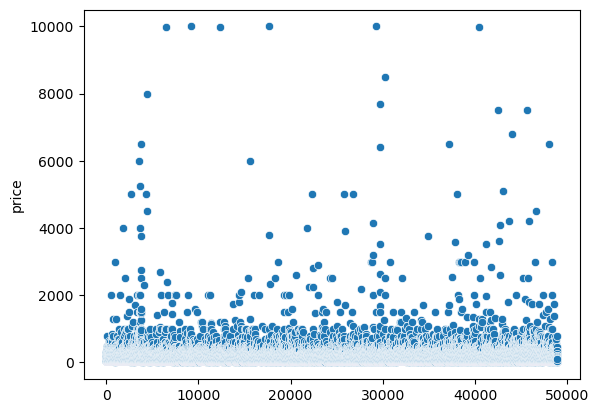

In [77]:
sns.scatterplot(data=dataset['price'])

In [78]:
dataset['price'].describe()

count    48894.000000
mean       152.720763
std        240.156625
min          0.000000
25%         69.000000
50%        106.000000
75%        175.000000
max      10000.000000
Name: price, dtype: float64

In [79]:
# calculating the high and low value in 'price' features
Q1 = 69
Q3 = 176
IQR = Q3 - Q1

high = Q3 + 1.5 * IQR
low = Q1 - 1.5 * IQR

print(f"IQR of price: {IQR}")
print(f"High value: {high}")
print(f"Low value: {low}")

IQR of price: 107
High value: 336.5
Low value: -91.5


In [80]:
# make a copy of the data
dataset_df = dataset.copy()

In [81]:
# remove the outliers
dataset_df = dataset_df[dataset_df['price'] <= high]
dataset_df = dataset_df[dataset_df['price'] >= low]

<Axes: ylabel='price'>

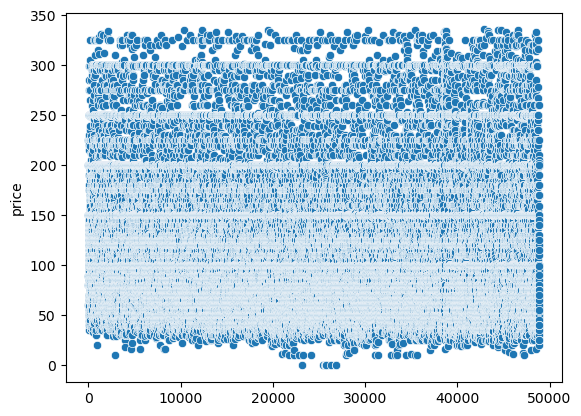

In [82]:
sns.scatterplot(data=dataset_df['price'])

In [83]:
print(f"Data shape before: {dataset.shape}")
print(f"Data shape after: {dataset_df.shape}")
print(f"Total number of outliers removed: {dataset.shape[0] - dataset_df.shape[0]}")

Data shape before: (48894, 235)
Data shape after: (45931, 235)
Total number of outliers removed: 2963


**Finding the most important features for the model**

In [84]:
dataset_df.columns

Index(['id', 'host_id', 'latitude', 'longitude', 'price', 'minimo_noites',
       'numero_de_reviews', 'calculado_host_listings_count',
       'disponibilidade_365', 'bairro_group_Brooklyn',
       ...
       'bairro_Williamsbridge', 'bairro_Williamsburg', 'bairro_Willowbrook',
       'bairro_Windsor Terrace', 'bairro_Woodhaven', 'bairro_Woodlawn',
       'bairro_Woodrow', 'bairro_Woodside', 'room_type_Private room',
       'room_type_Shared room'],
      dtype='object', length=235)

In [85]:
# splitting the data
X = dataset_df.drop(['price'], axis=1)
Y = dataset_df['price']

print(X.shape)
print(Y.shape)

(45931, 234)
(45931,)


In [86]:
# instantiate the model
model = ExtraTreesRegressor()

# feat the data
model.fit(X, Y)

ExtraTreesRegressor()

In [87]:
print(model.feature_importances_)

[5.87374634e-02 5.79175278e-02 7.39743238e-02 7.72310823e-02
 5.27443033e-02 4.83493759e-02 3.97380228e-02 5.63844502e-02
 1.89698889e-03 5.96002391e-02 6.54967219e-04 1.49542445e-04
 1.43438348e-06 8.81772857e-05 6.46162398e-04 8.42525689e-04
 2.34080225e-05 2.00716761e-04 2.85748313e-04 9.71512612e-05
 1.51006268e-05 2.74170586e-06 3.46280837e-04 3.52895025e-05
 1.89960737e-03 1.97862223e-04 8.98871431e-05 2.21310011e-04
 1.39612021e-04 6.58707722e-05 5.91311206e-04 2.14607037e-04
 2.99307563e-04 3.94684942e-04 1.37713713e-04 1.24097243e-05
 6.33220310e-04 1.55744927e-04 5.06986837e-06 1.03842327e-03
 1.64270966e-04 2.49439797e-04 5.23926244e-04 1.04122618e-05
 1.69624577e-04 1.80433454e-03 9.13683777e-04 3.97874718e-05
 2.96650306e-04 5.61200593e-05 1.27139572e-04 8.68929182e-05
 1.17588622e-03 3.02050030e-07 2.77842741e-04 5.42422259e-05
 1.54705274e-04 6.24714848e-05 1.89350455e-04 3.35591322e-05
 2.20486578e-04 7.81509975e-05 1.43997593e-03 2.79071714e-04
 3.65903964e-04 4.992391

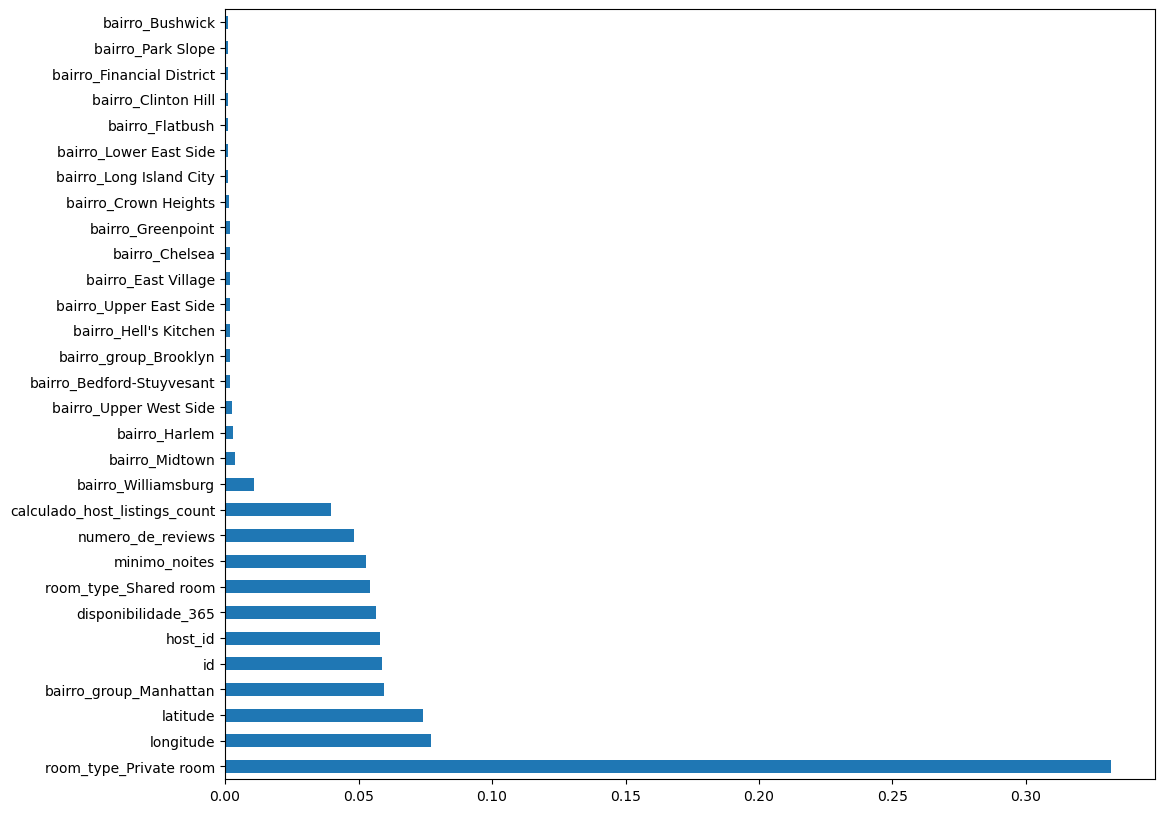

In [88]:
# show the top 20 features for the model
plt.figure(figsize=(12,10))
feature_importance=pd.Series(model.feature_importances_,index=X.columns)
feature_importance.nlargest(30).plot(kind='barh')
plt.show()

- From the top 20, we can select the top 13 features whose importance level are higher:
  1. room_type_Private room
  2. longitude
  3. latitude
  4. bairro_group_Manhattan
  5. id
  6. host_id
  7. disponibilidade_365
  8. room_type_Shared room
  9. minimo_noites
  10. numero_de_reviews
  11. calculado_host_listings_count
  12. bairro_Williamsburg
  13. bairro_Midtown

**Data Normalization**
- The values will be scaled between 0 and 1.

In [89]:
# store columns with specific data type 
integer_columns = dataset_df.select_dtypes(include=['int64']).columns 
float_columns = dataset_df.select_dtypes(include=['float64']).columns 

print(f"Integer columns: {integer_columns}")
print(f"Float columns: {float_columns}")


Integer columns: Index(['id', 'host_id', 'price', 'minimo_noites', 'numero_de_reviews',
       'calculado_host_listings_count', 'disponibilidade_365'],
      dtype='object')
Float columns: Index(['latitude', 'longitude'], dtype='object')


In [90]:
# instantiate the scaler
scaling = MinMaxScaler()

# define the columns for normalization
col_for_normalization = ['id', 'host_id', 'minimo_noites', 'numero_de_reviews',
       'calculado_host_listings_count', 'disponibilidade_365', 'latitude', 'longitude']

# apply normalization
dataset_df[col_for_normalization] = scaling.fit_transform(dataset_df[col_for_normalization])

In [91]:
dataset_df.head()

,id,host_id,latitude,longitude,price,minimo_noites,numero_de_reviews,calculado_host_listings_count,disponibilidade_365,bairro_group_Brooklyn,...,bairro_Williamsbridge,bairro_Williamsburg,bairro_Willowbrook,bairro_Windsor Terrace,bairro_Woodhaven,bairro_Woodlawn,bairro_Woodrow,bairro_Woodside,room_type_Private room,room_type_Shared room
0,0.000000,0.000001,0.614199,0.490469,225,0.000000,0.071542,0.003067,0.972603,False,...,False,False,False,False,False,False,False,False,False,False
1,0.000029,0.000008,0.748252,0.569257,150,0.001601,0.000000,0.000000,1.000000,False,...,False,False,False,False,False,False,False,False,True,False
2,0.000034,0.000009,0.448496,0.535649,89,0.000000,0.429253,0.000000,0.531507,True,...,False,False,False,False,False,False,False,False,False,False
3,0.000067,0.000017,0.722820,0.565324,80,0.007206,0.014308,0.000000,0.000000,False,...,False,False,False,False,False,False,False,False,False,False
4,0.000069,0.000018,0.599802,0.506972,200,0.001601,0.117647,0.000000,0.353425,False,...,False,False,False,False,False,False,False,False,False,False


In [92]:
# relevant features from the top 13
relevant_cols = ['room_type_Private room', 'longitude', 'latitude', 'id', 'bairro_group_Manhattan', \
'host_id', 'disponibilidade_365', 'room_type_Shared room', 'minimo_noites', 'numero_de_reviews', \
'calculado_host_listings_count', 'bairro_Williamsburg', 'bairro_Midtown', 'price']

print(len(relevant_cols))
# X['bairro_Midtown']

14


In [93]:
# reduced dataset
X_ = dataset_df[relevant_cols]

print(X_.shape)

(45931, 14)


In [94]:
X_.head()

,room_type_Private room,longitude,latitude,id,bairro_group_Manhattan,host_id,disponibilidade_365,room_type_Shared room,minimo_noites,numero_de_reviews,calculado_host_listings_count,bairro_Williamsburg,bairro_Midtown,price
0,False,0.490469,0.614199,0.000000,True,0.000001,0.972603,False,0.000000,0.071542,0.003067,False,True,225
1,True,0.569257,0.748252,0.000029,True,0.000008,1.000000,False,0.001601,0.000000,0.000000,False,False,150
2,False,0.535649,0.448496,0.000034,False,0.000009,0.531507,False,0.000000,0.429253,0.000000,False,False,89
3,False,0.565324,0.722820,0.000067,True,0.000017,0.000000,False,0.007206,0.014308,0.000000,False,False,80
4,False,0.506972,0.599802,0.000069,True,0.000018,0.353425,False,0.001601,0.117647,0.000000,False,False,200


**Save the updated data in CSV format**

In [95]:
X_.to_csv("data_after_FE.csv")